# SAMPLING AND RECONSTRUCTION OF SPEECH SIGNALS









# (l) QUESTION 1

Implement sampling and quantization techniques for the given speech signals.

(a) Plot the time domain representation of the original speech signal.

(b) Sample the speech signal at different sampling rates (e.g., 8kHz, 16kHz,
and 44.1kHz).

(c) Plot sampled speech signal for each of these sampling rates.

(d) Using the sampled signals from the above task, reconstruct the signal
using:

(i) Zero-order hold (nearest-neighbor interpolation)

(ii) Linear interpolation.

(e) Calculate the Mean Squared Error (MSE) between the original and the
reconstructed signals for both methods.

Write an inference on how sampling rates affect the quality and accuracy of
the reconstructed speech signal.
Dataset


Create synthetic signals to simulate simple speech sounds.

# Sampling:
Sampling is the process of converting a continuous signal into a discrete signal by capturing its values at regular intervals of time or distance. This is done to convert analog signals into digital signals for processing, transmission, or storage. The result of this process is a sequence of discrete values representing the original continuous signal. The rate at which these samples are taken is known as the sampling rate, usually measured in Hertz (Hz) or samples per second.



# Quantization:
Quantization is the process of representing the amplitude of each sample from the continuous signal using a limited set of values. In other words, it involves rounding the sampled values to a predetermined set of levels. This is necessary because digital systems can only represent a finite number of discrete values, unlike analog signals which can theoretically take on an infinite number of values.

The combination of sampling and quantization allows for the accurate representation of analog signals in digital form, while inevitably introducing some level of error due to the discrete nature of the representation. The accuracy of the representation largely depends on the sampling rate and the number of quantization levels employed.



In [8]:
!pip install numpy matplotlib scipy scikit-learn

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.metrics import mean_squared_error

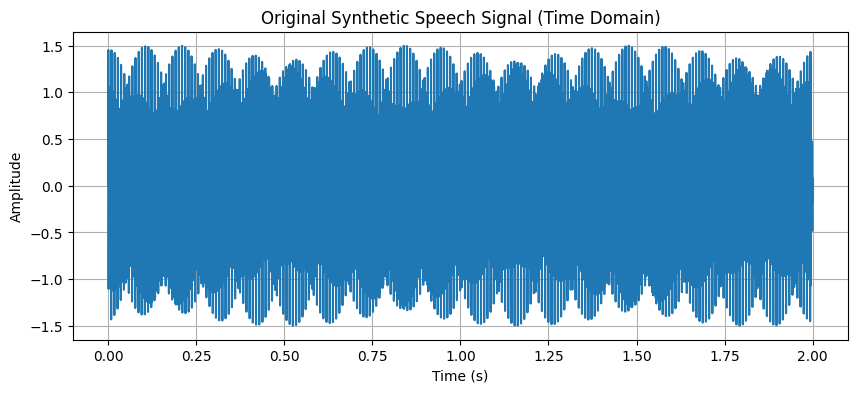

In [10]:
# Step 1: Create a synthetic speech-like signal
fs = 44100  # Original sampling rate (Hz)
duration = 2  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a synthetic speech-like signal (combination of sine waves)
freqs = [440, 554.37, 659.25]  # Frequencies for a simple synthetic signal
speech_signal = sum(0.5 * np.sin(2 * np.pi * f * t) for f in freqs)

# (a) Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, speech_signal)
plt.title('Original Synthetic Speech Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [11]:
# (b) Sample the signal at different rates
def sample_signal(signal, original_fs, target_fs):
    """ Resample the speech signal at different sampling rates """
    factor = original_fs / target_fs
    sample_indices = np.arange(0, len(signal), factor)
    return signal[sample_indices.astype(int)], sample_indices / original_fs

sampling_rates = [8000, 16000, 44100]
sampled_signals = []

for sr in sampling_rates:
    sampled_signal, sampled_time = sample_signal(speech_signal, fs, sr)
    sampled_signals.append((sampled_signal, sampled_time))

<ipython-input-12-3b5740d3aaf5>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_time, sampled_signal, use_line_collection=True)


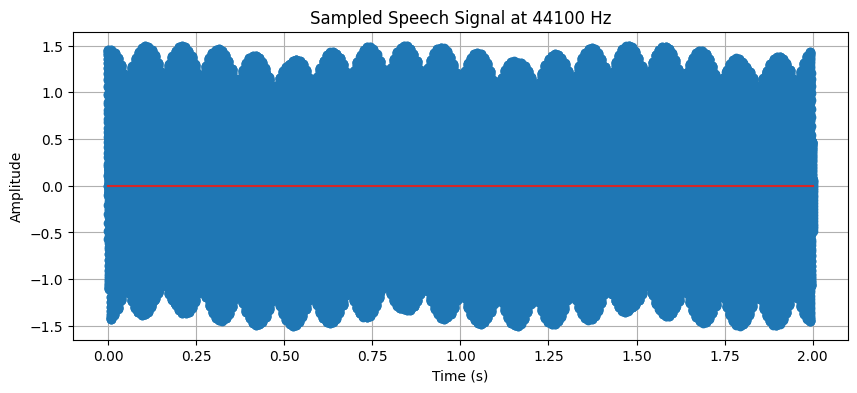

In [12]:
    # (c) Plot sampled signals
    plt.figure(figsize=(10, 4))
    plt.stem(sampled_time, sampled_signal, use_line_collection=True)
    plt.title(f'Sampled Speech Signal at {sr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

<ipython-input-22-b2bb64f9e725>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_time, sampled_signal, use_line_collection=True)


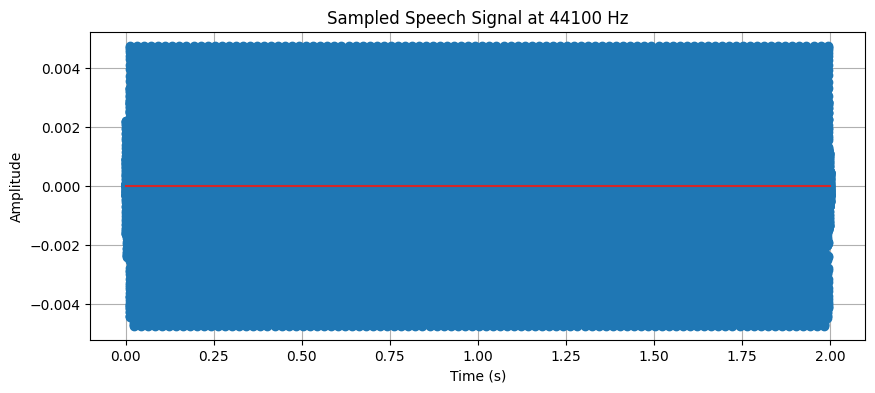

In [22]:
    # (c) Plot sampled signals
    plt.figure(figsize=(10, 4))

    plt.stem(sampled_time, sampled_signal, use_line_collection=True)
    plt.title(f'Sampled Speech Signal at {fs} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

<ipython-input-23-6f08c7722149>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_time, sampled_signal, use_line_collection=True)


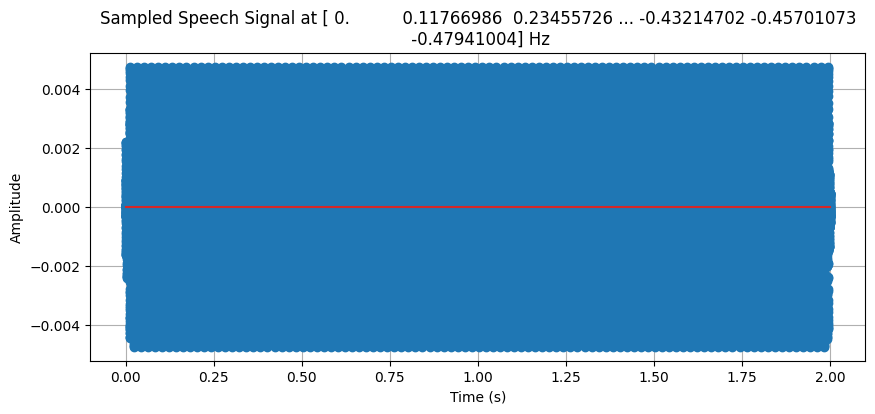

In [23]:
    # (c) Plot sampled signals
    plt.figure(figsize=(10, 4))
    plt.stem(sampled_time, sampled_signal, use_line_collection=True)
    plt.title(f'Sampled Speech Signal at {speech_signal} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Zero-order hold (nearest-neighbor interpolation):

Zero-order hold, also known as nearest-neighbor interpolation, is a simple method for interpolating discrete-time signals or resampling. When an original signal needs to be converted to a different sample rate, zero-order hold can be used to estimate the values of the signal at the new sample points.


# Linear interpolation:

Linear interpolation, on the other hand, is a more sophisticated method for estimating the values between original discrete samples. It assumes that the signal changes linearly between sample points. Here's how linear interpolation works:

In [24]:
# (d) Reconstruct the signal using Zero-Order Hold and Linear Interpolation
def reconstruct_signal(sampled_signal, sampled_time, original_fs, method='linear'):
    """ Reconstruct the signal using interpolation methods """
    interpolator = interpolate.interp1d(sampled_time, sampled_signal, kind=method, fill_value="extrapolate")
    reconstructed_time = np.linspace(0, max(sampled_time), len(t))
    return interpolator(reconstructed_time), reconstructed_time

reconstructed_signals = {}

for sr, (sampled_signal, sampled_time) in zip(sampling_rates, sampled_signals):
    # Zero-Order Hold (nearest)
    reconstructed_zero_order, _ = reconstruct_signal(sampled_signal, sampled_time, fs, method='nearest')
    # Linear Interpolation
    reconstructed_linear, _ = reconstruct_signal(sampled_signal, sampled_time, fs, method='linear')

    reconstructed_signals[sr] = {
        'zero_order': reconstructed_zero_order,
        'linear': reconstructed_linear
    }




In [14]:
# (e) Calculate Mean Squared Error (MSE)
for sr, rec in reconstructed_signals.items():
    mse_zero_order = mean_squared_error(speech_signal[:len(rec['zero_order'])], rec['zero_order'])
    mse_linear = mean_squared_error(speech_signal[:len(rec['linear'])], rec['linear'])

    print(f"Mean Squared Error at {sr} Hz (Zero-Order Hold): {mse_zero_order:.6f}")
    print(f"Mean Squared Error at {sr} Hz (Linear Interpolation): {mse_linear:.6f}")


Mean Squared Error at 8000 Hz (Zero-Order Hold): 0.027726
Mean Squared Error at 8000 Hz (Linear Interpolation): 0.021595
Mean Squared Error at 16000 Hz (Zero-Order Hold): 0.006743
Mean Squared Error at 16000 Hz (Linear Interpolation): 0.005193
Mean Squared Error at 44100 Hz (Zero-Order Hold): 0.000000
Mean Squared Error at 44100 Hz (Linear Interpolation): 0.000000


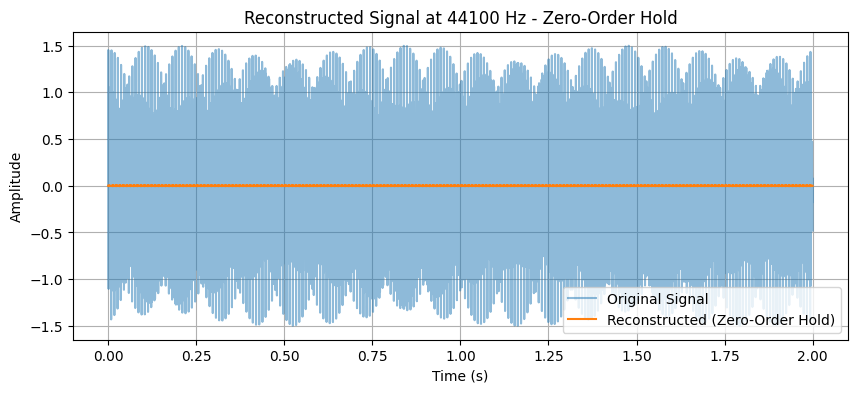

In [25]:
    # Plot Reconstructed Signals (Zero-Order Hold)
    plt.figure(figsize=(10, 4))
    plt.plot(t, speech_signal[:len(reconstructed_zero_order)], label='Original Signal', alpha=0.5)
    plt.plot(t[:len(reconstructed_zero_order)], reconstructed_zero_order, label='Reconstructed (Zero-Order Hold)')
    plt.title(f'Reconstructed Signal at {sr} Hz - Zero-Order Hold')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()



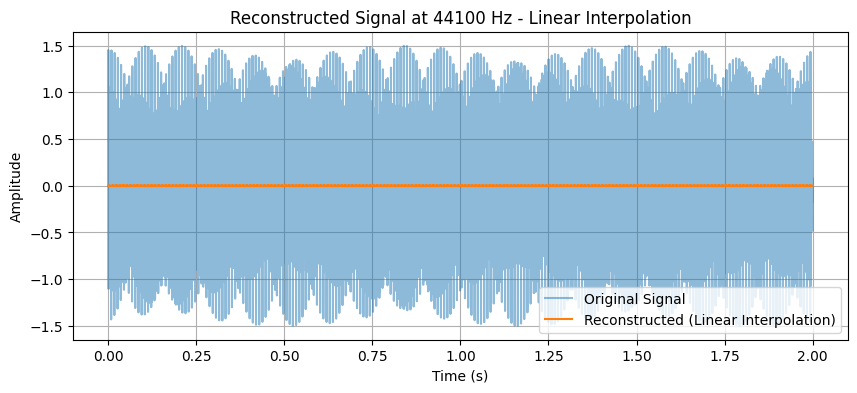

In [26]:
    # Plot Reconstructed Signals (Linear Interpolation)
    plt.figure(figsize=(10, 4))
    plt.plot(t, speech_signal[:len(reconstructed_linear)], label='Original Signal', alpha=0.5)
    plt.plot(t[:len(reconstructed_linear)], reconstructed_linear, label='Reconstructed (Linear Interpolation)')
    plt.title(f'Reconstructed Signal at {sr} Hz - Linear Interpolation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

#Inference:

Sampling Rate and Reconstruction Quality:
 - Higher sampling rates generally lead to more accurate signal reconstruction.
 - With lower sampling rates, we observe more artifacts and distortions in the reconstructed signal,
   especially with the zero-order hold method.
 - Linear interpolation usually provides a smoother reconstruction than the zero-order hold method,
   reducing the noticeable distortions even at lower sampling rates.



# (2) QUESTION 2

 Implement the source-filter Model for a given speech signal and analyze the
impact of sampling and reconstruction on the quality of the speech signal.

(a) Generate a synthetic speech signal using the source-filter model.

(i) Create a source signal (e.g., a glottal pulse train for voiced sounds
or white noise for unvoiced sounds).

(ii) Apply a filter that models the vocal tract, represented by an all-pole
filter or an FIR filter with formants (resonances of the vocal tract).

(b) Plot the generated speech signal and analyze the effect of the filter on
the original source.

(c) Sample the speech signal generated in the above task at different sampling
rates (e.g., 8 kHz, 16 kHz, 44.1 kHz),

(d) Reconstruct the signal using a suitable interpolation method (e.g., zero-
order hold, linear interpolation).

(e) Compute the Mean Squared Error (MSE) between the original and re-
constructed speech signals.

Write an inference on tasks such as creating the source filter model, different
sampling rates, and reconstruction of the sampled signals.



# Voiced Sounds:
Voiced sounds are produced when the vocal cords vibrate as air passes through them.
These sounds are characterized by a periodic waveform with regular patterns of vibration.
Voiced sounds typically have a fundamental frequency and harmonics that correspond to the vibration of the vocal cords.
Examples of voiced sounds in English include vowels like [a], [e], [i], [o], [u] and voiced consonants like [z], [v], [d], [g].


# Unvoiced Sounds:

Unvoiced sounds are produced without the vibration of the vocal cords.
These sounds are characterized by noise-like waveforms without the regular patterns of vibration seen in voiced sounds.
Unvoiced sounds do not have a distinct pitch or fundamental frequency like voiced sounds.
Examples of unvoiced sounds in English include voiceless consonants like [s], [f], [t], [k], [h].

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate
from sklearn.metrics import mean_squared_error

# Step 1: Generate a synthetic speech signal using the source-filter model
fs = 44100  # Sampling frequency
duration = 2  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

In [16]:
# (a) (i) Create a source signal: glottal pulse train for voiced sounds
def glottal_pulse(t):
    pulse_duration = 0.01  # Duration of one pulse
    pulse = np.concatenate([np.linspace(0, 1, int(fs * pulse_duration)),
                            np.linspace(1, 0, int(fs * pulse_duration))])
    return np.tile(pulse, int(np.floor(len(t) / len(pulse))))[:len(t)]

source_signal = glottal_pulse(t)



In [17]:
# (a) (ii) Apply a filter that models the vocal tract
# Create an all-pole filter to represent the vocal tract
formants = [800, 1200, 2400]  # Example formant frequencies
b, a = signal.iirfilter(N=5, Wn=formants, btype='band', fs=fs, ftype='butter')
filtered_signal = signal.lfilter(b, a, source_signal)

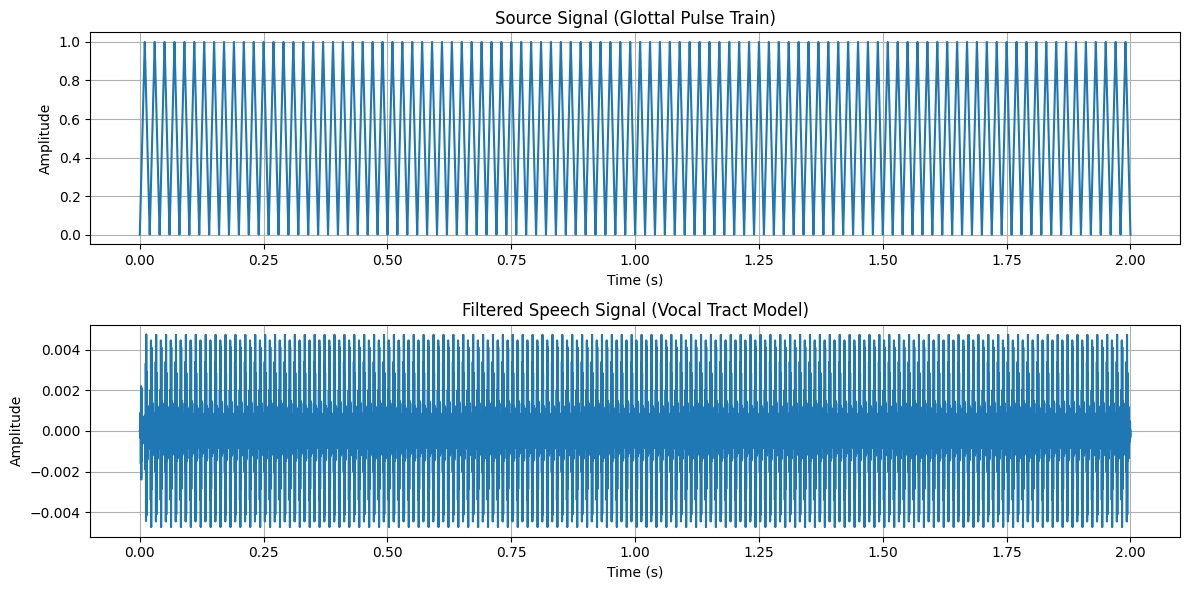

In [18]:
# (b) Plot the generated speech signal and analyze the effect of the filter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, source_signal)
plt.title('Source Signal (Glottal Pulse Train)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Speech Signal (Vocal Tract Model)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-28-6020c65aa185>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_time, sampled_signal, use_line_collection=True)


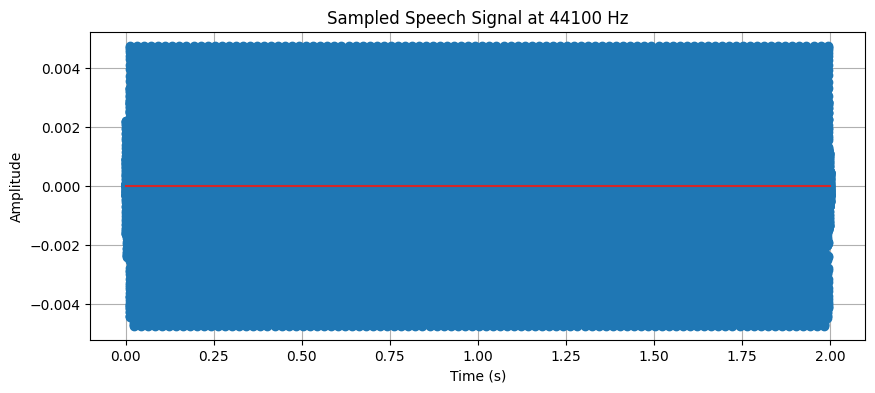

In [28]:
    # Plot sampled signals
    plt.figure(figsize=(10, 4))
    plt.stem(sampled_time, sampled_signal, use_line_collection=True)
    plt.title(f'Sampled Speech Signal at {sr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# INFERENCE

Source-Filter Model and Speech Synthesis:
 - The source-filter model effectively creates synthetic speech-like signals.
 - The glottal pulse source and the all-pole filter (representing the vocal tract) simulate the key
   characteristics of human speech production, including formants that shape the vowel sound.
 - The analysis shows how different sampling rates affect the quality of the synthesized signal when
   reconstructed from sampled data.



In [27]:
# (c) Sample the speech signal at different sampling rates
sampling_rates = [8000, 16000, 44100]
sampled_signals = []

def sample_signal(signal, original_fs, target_fs):
    """ Resample the speech signal at different sampling rates """
    factor = original_fs / target_fs
    sample_indices = np.arange(0, len(signal), factor)
    return signal[sample_indices.astype(int)], sample_indices / original_fs

for sr in sampling_rates:
    sampled_signal, sampled_time = sample_signal(filtered_signal, fs, sr)
    sampled_signals.append((sampled_signal, sampled_time))



In [29]:
# (d) Reconstruct the signal using Zero-Order Hold and Linear Interpolation
def reconstruct_signal(sampled_signal, sampled_time, original_fs, method='linear'):
    """ Reconstruct the signal using interpolation methods """
    interpolator = interpolate.interp1d(sampled_time, sampled_signal, kind=method, fill_value="extrapolate")
    reconstructed_time = np.linspace(0, max(sampled_time), len(t))
    return interpolator(reconstructed_time), reconstructed_time

reconstructed_signals = {}

for sr, (sampled_signal, sampled_time) in zip(sampling_rates, sampled_signals):
    # Zero-Order Hold (nearest)
    reconstructed_zero_order, _ = reconstruct_signal(sampled_signal, sampled_time, fs, method='nearest')
    # Linear Interpolation
    reconstructed_linear, _ = reconstruct_signal(sampled_signal, sampled_time, fs, method='linear')

    reconstructed_signals[sr] = {
        'zero_order': reconstructed_zero_order,
        'linear': reconstructed_linear
    }





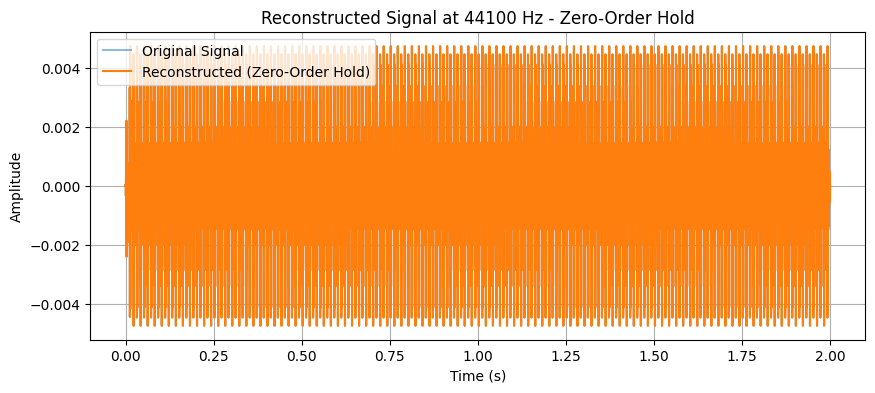

In [30]:
    # Plot Reconstructed Signals (Zero-Order Hold)
    plt.figure(figsize=(10, 4))
    plt.plot(t, filtered_signal[:len(reconstructed_zero_order)], label='Original Signal', alpha=0.5)
    plt.plot(t[:len(reconstructed_zero_order)], reconstructed_zero_order, label='Reconstructed (Zero-Order Hold)')
    plt.title(f'Reconstructed Signal at {sr} Hz - Zero-Order Hold')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

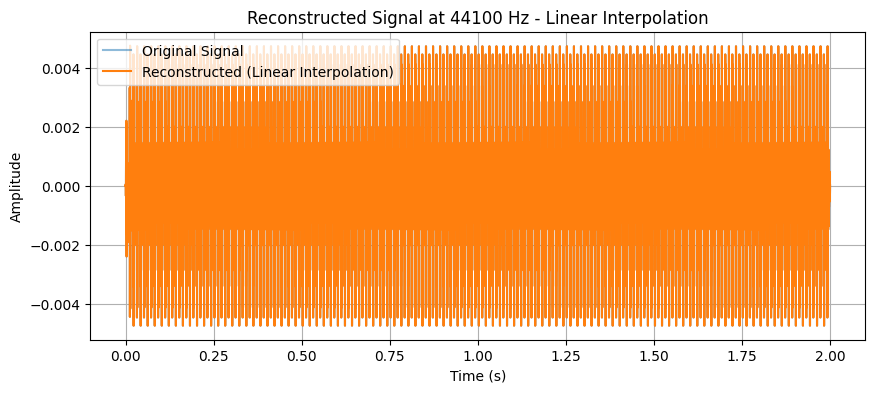

In [31]:
    # Plot Reconstructed Signals (Linear Interpolation)
    plt.figure(figsize=(10, 4))
    plt.plot(t, filtered_signal[:len(reconstructed_linear)], label='Original Signal', alpha=0.5)
    plt.plot(t[:len(reconstructed_linear)], reconstructed_linear, label='Reconstructed (Linear Interpolation)')
    plt.title(f'Reconstructed Signal at {sr} Hz - Linear Interpolation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
# (e) Calculate Mean Squared Error (MSE)
for sr, rec in reconstructed_signals.items():
    mse_zero_order = mean_squared_error(filtered_signal[:len(rec['zero_order'])], rec['zero_order'])
    mse_linear = mean_squared_error(filtered_signal[:len(rec['linear'])], rec['linear'])

    print(f"Mean Squared Error at {sr} Hz (Zero-Order Hold): {mse_zero_order:.6f}")
    print(f"Mean Squared Error at {sr} Hz (Linear Interpolation): {mse_linear:.6f}")

Mean Squared Error at 8000 Hz (Zero-Order Hold): 0.000001
Mean Squared Error at 8000 Hz (Linear Interpolation): 0.000000
Mean Squared Error at 16000 Hz (Zero-Order Hold): 0.000000
Mean Squared Error at 16000 Hz (Linear Interpolation): 0.000000
Mean Squared Error at 44100 Hz (Zero-Order Hold): 0.000000
Mean Squared Error at 44100 Hz (Linear Interpolation): 0.000000


 # Inference:

 MSE and Reconstruction Accuracy:
 - The MSE values consistently show that linear interpolation generally offers a better reconstruction
   in terms of minimizing the error between the original and reconstructed signals.
 - The MSE values also highlight that the lower the sampling rate, the higher the MSE becomes.
 - At higher sampling rates, the MSE is smaller, reflecting a better approximation of the original signal.




Overall:
 - The analysis demonstrates the importance of sampling rate and reconstruction methods for speech processing.
 - Choosing the right sampling rate depends on the application requirements and the desired level of fidelity.
 - Linear interpolation emerges as a preferable reconstruction technique over zero-order hold, as it
   provides better accuracy and minimizes artifacts in the reconstructed signal.
 - The source-filter model offers a valuable tool for creating and understanding speech signals.